In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

In [3]:
df = pd.read_csv("hotel_bookings.csv")
df.head()

,booking_time,hotel,room_type,price_per_night,nights,total_price,guests,channel,status,customer_age,payment_method,country,is_repeat_guest
0,2025-02-25 23:01:23,City Center Hotel,Deluxe,357.51,3,1072.53,3,Phone,Confirmed,34,UPI,UK,True
1,2024-04-14 23:01:23,City Center Hotel,Standard,159.49,3,478.47,3,Website,Confirmed,61,Net Banking,India,True
2,2024-12-29 23:01:23,City Center Hotel,Deluxe,454.14,7,3178.98,3,Phone,Cancelled,69,PayPal,UK,True
3,2024-05-01 23:01:23,City Center Hotel,Standard,72.34,7,506.38,1,Website,Confirmed,45,PayPal,USA,True
4,2024-12-26 23:01:23,Ocean View Resort,Deluxe,397.28,2,794.56,4,Website,Confirmed,65,Credit Card,India,False


In [6]:
df

,booking_time,hotel,room_type,price_per_night,nights,total_price,guests,channel,status,customer_age,payment_method,country,is_repeat_guest
0,2025-02-25 23:01:23,City Center Hotel,Deluxe,357.51,3,1072.53,3,Phone,Confirmed,34,UPI,UK,True
1,2024-04-14 23:01:23,City Center Hotel,Standard,159.49,3,478.47,3,Website,Confirmed,61,Net Banking,India,True
2,2024-12-29 23:01:23,City Center Hotel,Deluxe,454.14,7,3178.98,3,Phone,Cancelled,69,PayPal,UK,True
3,2024-05-01 23:01:23,City Center Hotel,Standard,72.34,7,506.38,1,Website,Confirmed,45,PayPal,USA,True
4,2024-12-26 23:01:23,Ocean View Resort,Deluxe,397.28,2,794.56,4,Website,Confirmed,65,Credit Card,India,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2024-06-13 23:01:23,City Center Hotel,Standard,288.79,5,1443.95,3,App,Confirmed,21,PayPal,Germany,True
9996,2025-02-18 23:01:23,Mountain Lodge,Suite,458.01,2,916.02,4,App,Confirmed,46,Net Banking,Germany,True
9997,2025-02-05 23:01:23,Mountain Lodge,Deluxe,137.08,3,411.24,2,Phone,Cancelled,63,UPI,Germany,True
9998,2024-08-01 23:01:23,City Center Hotel,Standard,312.41,3,937.23,3,App,Cancelled,48,UPI,Australia,False


In [8]:
df.shape

(10000, 13)

In [10]:
df.describe()

,price_per_night,nights,total_price,guests,customer_age
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,274.194938,3.987800,1094.055610,2.483700,43.825100
std,130.368383,2.002012,802.836375,1.121098,15.192024
min,50.010000,1.000000,50.010000,1.000000,18.000000
25%,160.707500,2.000000,433.702500,1.000000,31.000000
50%,273.725000,4.000000,889.235000,2.000000,44.000000
75%,387.167500,6.000000,1586.550000,3.000000,57.000000
max,499.980000,7.000000,3497.620000,4.000000,70.000000


In [12]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [14]:
df.isnull().sum()

booking_time       0
hotel              0
room_type          0
price_per_night    0
nights             0
total_price        0
guests             0
channel            0
status             0
customer_age       0
payment_method     0
country            0
is_repeat_guest    0
dtype: int64

In [18]:
df['is_cancelled'] = df['status'] == 'Cancelled'

In [ ]:
df = df.drop(columns=['status', 'booking_time'])  # We won't use these for now


In [25]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [27]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('is_cancelled', axis=1)
y = df_encoded['is_cancelled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1597
        True       1.00      1.00      1.00       403

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy: 1.0


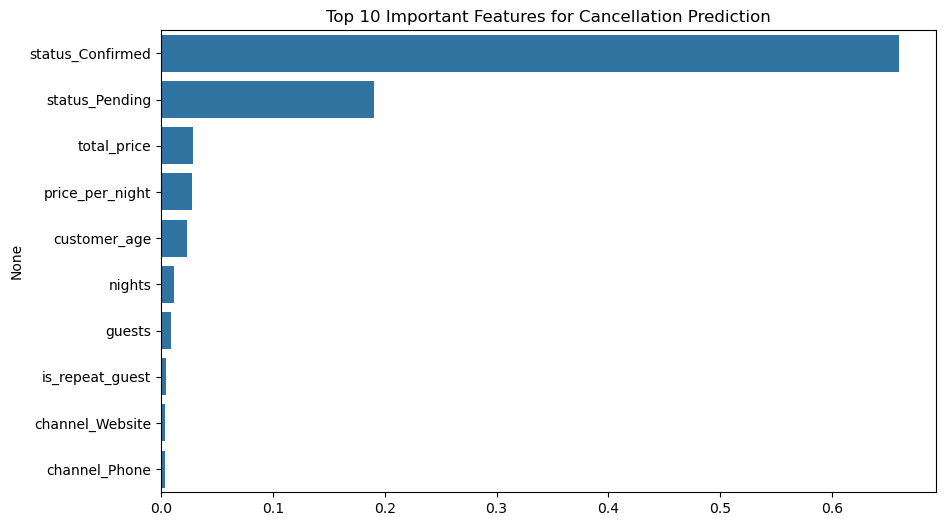

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Important Features for Cancellation Prediction")
plt.show()


In [33]:
import joblib

# Save the model to a file
joblib.dump(model, 'hotel_cancellation_model.joblib')

print("Model saved as 'hotel_cancellation_model.joblib'")


Model saved as 'hotel_cancellation_model.joblib'
